# Univariate Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (16,8)

## Features of a data set

In [4]:
loan = pd.read_csv("data/train.csv")
loan

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849               0.00         nan            360.00   
1               4583           1,508.00      128.00            360.00   
2               3000               0.00       66.00            360.00   
3               2583           2,358.00      120.00            360.00   
4               6000               0.00      141.00            360.00   
..               ...                ...         ...               ...   
609             2900               0.00       71.00            360.00   
610             4106               0.00       40.00            180.00   
611             8072             240.00      253.00            360.00   
612             7583               0.00      187.00            360.00   
613             4583               0.00      133.00            360.00   

     Credit_History Property_Area Loan_Status  
0              1.00         Urban           Y  
1              1.00         Rural           N  
2              1.00         Urban           Y  
3              1.00         Urban           Y  
4              1.00         Urban           Y  
..              ...           ...         ...  
609            1.00         Rural           Y  
610            1.00         Rural           Y  
611            1.00         Urban           Y  
612            1.00         Urban           Y  
613            0.00     Semiurban           N  

[614 rows x 13 columns]

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Loan Performance

In [6]:
loan['Loan_Status'] = np.where(loan['Loan_Status'] == 'Y', 1,0)
loan.head(3)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         nan            360.00   
1             4583           1,508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   

   Credit_History Property_Area  Loan_Status  
0            1.00         Urban            1  
1            1.00         Rural            0  
2            1.00         Urban            1

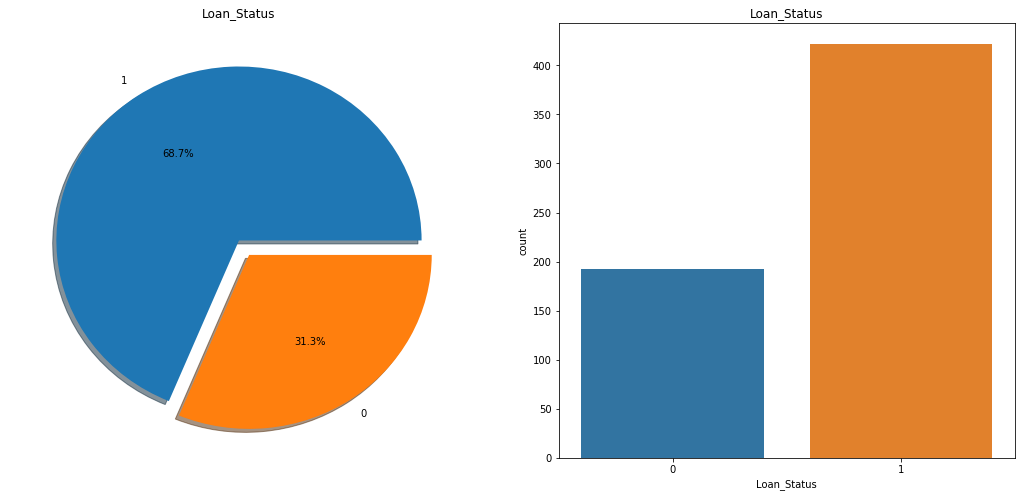

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
loan['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Loan_Status')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=loan,ax=ax[1])
ax[1].set_title('Loan_Status')
plt.show()

It is evident that not many passengers survived the accident. 

Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## Descriptive Statistics


### Continuous Variables:

In case of continuous variables, we need to understand the central tendency and spread of the variable
![](figures/continous.PNG)

In [7]:
loan.describe().transpose()

count     mean      std    min      25%      50%      75%  \
ApplicantIncome   614.00 5,403.46 6,109.04 150.00 2,877.50 3,812.50 5,795.00   
CoapplicantIncome 614.00 1,621.25 2,926.25   0.00     0.00 1,188.50 2,297.25   
LoanAmount        592.00   146.41    85.59   9.00   100.00   128.00   168.00   
Loan_Amount_Term  600.00   342.00    65.12  12.00   360.00   360.00   360.00   
Credit_History    564.00     0.84     0.36   0.00     1.00     1.00     1.00   
Loan_Status       614.00     0.69     0.46   0.00     0.00     1.00     1.00   

                        max  
ApplicantIncome   81,000.00  
CoapplicantIncome 41,667.00  
LoanAmount           700.00  
Loan_Amount_Term     480.00  
Credit_History         1.00  
Loan_Status            1.00

#### Central Tendency Distribution

In [8]:
print('Highest ApplicantIncome is:',loan['ApplicantIncome'].max(),'Years')
print('Lowest ApplicantIncome is:',loan['ApplicantIncome'].min(),'Years')
print('Average Highest ApplicantIncome is:',loan['ApplicantIncome'].mean(),'Years')

Highest ApplicantIncome is: 81000 Years
Lowest ApplicantIncome is: 150 Years
Average Highest ApplicantIncome is: 5403.459283387622 Years


In [9]:
loan[['ApplicantIncome']].describe()

ApplicantIncome
count           614.00
mean          5,403.46
std           6,109.04
min             150.00
25%           2,877.50
50%           3,812.50
75%           5,795.00
max          81,000.00

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

#### Histograms , Boxplots & Violin Plots


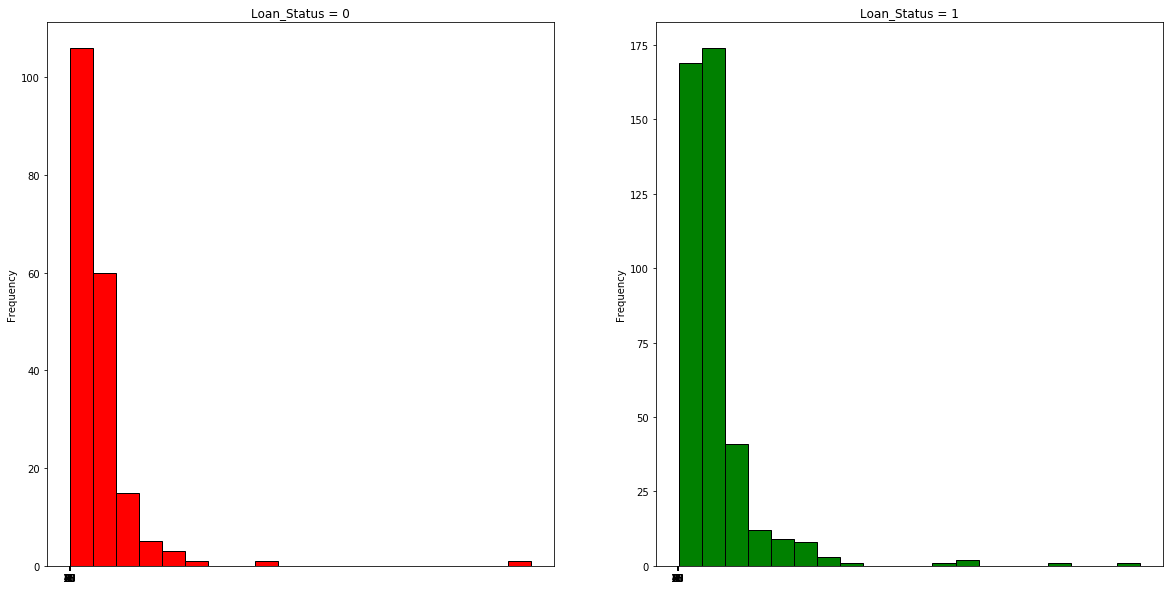

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,10))
loan[loan['Loan_Status']==0].ApplicantIncome.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Loan_Status = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
loan[loan['Loan_Status']==1].ApplicantIncome.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Loan_Status = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


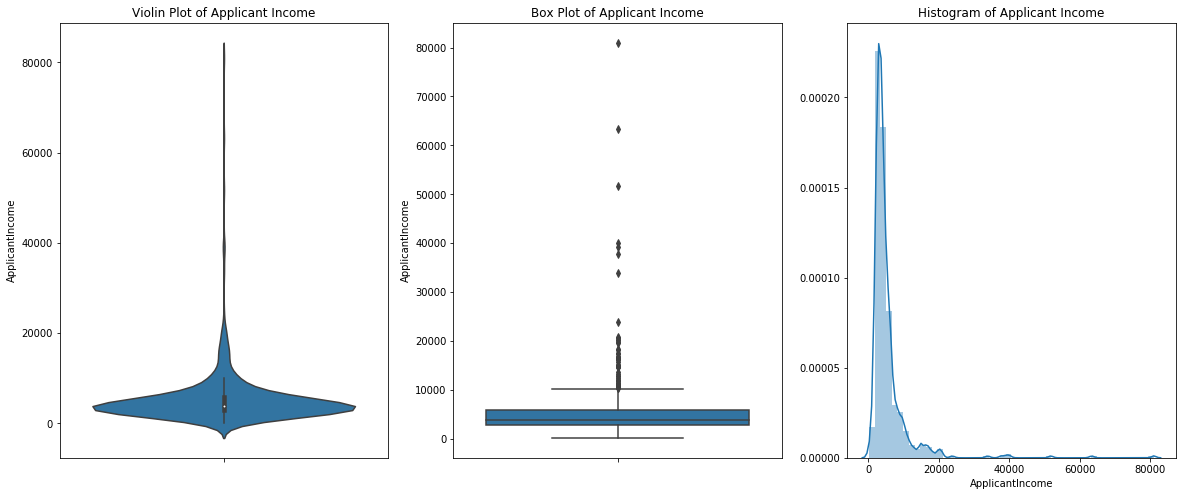

In [11]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.violinplot(y="ApplicantIncome", data=loan,split=True,ax=ax[0])
ax[0].set_title('Violin Plot of Applicant Income')
sns.boxplot(data=loan,y="ApplicantIncome",ax=ax[1])
ax[1].set_title('Box Plot of Applicant Income')
sns.distplot(loan['ApplicantIncome'],ax=ax[2])
ax[2].set_title('Histogram of Applicant Income')
plt.show()


![](figures/box.PNG)

#### Skeweness

**Interpretation:**
- Skewness &> 0 - Right skewed distribution - most values are concentrated on left of the mean, with extreme values to the right.
- Skewness < 0 - Left skewed distribution - most values are concentrated on the right of the mean, with extreme values to the left.
- Skewness = 0 - mean = median, the distribution is symmetrical around the mean.


In [12]:
#skeweness
print("Skeweness : %f" % loan['ApplicantIncome'].skew())

Skeweness : 6.539513


#### Kurtosis
- Interpretation:
    > - Kurtosis &> 3 - Leptokurtic distribution, sharper than a normal distribution, with values concentrated around the mean and longer tails.This means high probability for extreme values.
    > - Kurtosis < 3 - Platykurtic distribution, flatter than a normal distribution with a wider peak. The probability for extreme values is less than for a normal distribution, and the values are wider spread around the mean.
    > - Kurtosis = 3 - Mesokurtic distribution - normal distribution for example.

In [13]:
#kurtosis
print("Kurtosis : %f" % loan['ApplicantIncome'].kurt())

Kurtosis : 60.540676


---

### Categorical Variables:
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `LoanStatus`:

In [14]:
loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

422 users out of 614 pay their loans; their `loan status` value is `Y`. To calculate the proportion, pass `normalize=True` to the `value_counts` function.

In [15]:
loan['Loan_Status'].value_counts(normalize=True)

1   0.69
0   0.31
Name: Loan_Status, dtype: float64

In [16]:
loan.groupby(['Loan_Status','Education'])['Loan_Status'].count()

Loan_Status  Education   
0            Graduate        140
             Not Graduate     52
1            Graduate        340
             Not Graduate     82
Name: Loan_Status, dtype: int64

#### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:

In [17]:
pd.crosstab(loan['Loan_Status'], loan['Education'])

Education    Graduate  Not Graduate
Loan_Status                        
0                 140            52
1                 340            82

In [18]:
pd.crosstab(loan['Loan_Status'], loan['Married'], normalize=True)

Married       No  Yes
Loan_Status          
0           0.13 0.18
1           0.22 0.47

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` - a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` — what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.

Let’s take a look at the average number of day, evening, and night calls by area code:

In [19]:
loan.pivot_table(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
               ['Loan_Amount_Term'], aggfunc='mean')

ApplicantIncome  CoapplicantIncome  LoanAmount
Loan_Amount_Term                                                
12.00                    4,625.00           2,857.00      111.00
36.00                    3,419.50               0.00      117.50
60.00                    5,032.50           2,850.50      140.00
84.00                    4,128.50           1,093.50      132.25
120.00                   2,792.67             362.00       22.33
180.00                   6,927.89           2,556.15      147.52
240.00                   5,907.75               0.00      118.33
300.00                   8,184.92           2,280.38      185.15
360.00                   5,298.08           1,562.26      147.25
480.00                   4,398.93           1,013.00      151.80

### Visualize

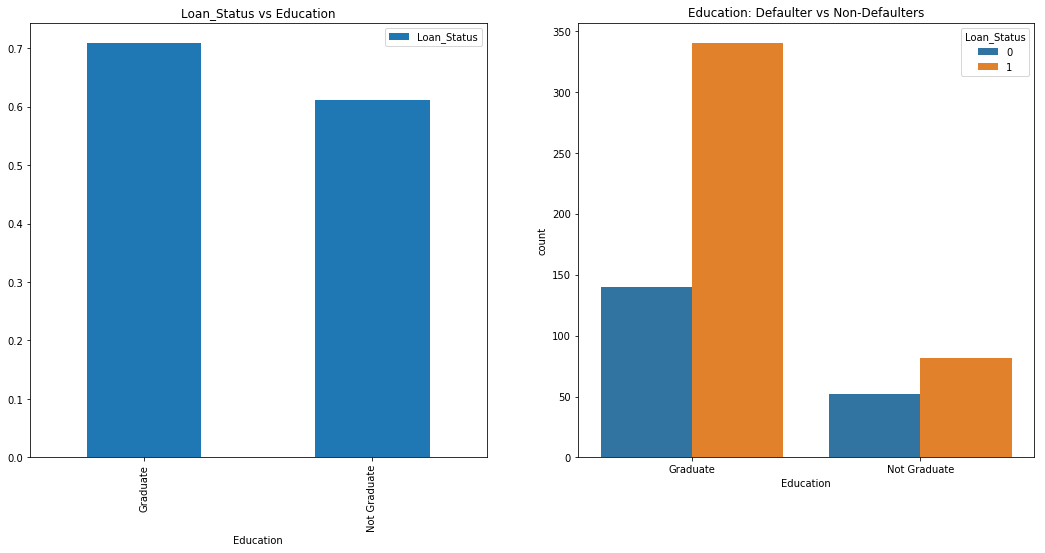

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
loan[['Education','Loan_Status']].groupby(['Education']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Loan_Status vs Education')
sns.countplot('Education',hue='Loan_Status',data=loan,ax=ax[1])
ax[1].set_title('Education: Defaulter vs Non-Defaulters')
plt.show()

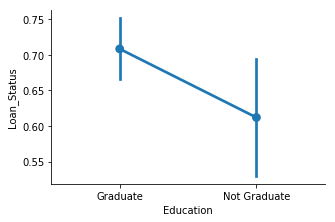

In [40]:
sns.factorplot('Education','Loan_Status',data=loan)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

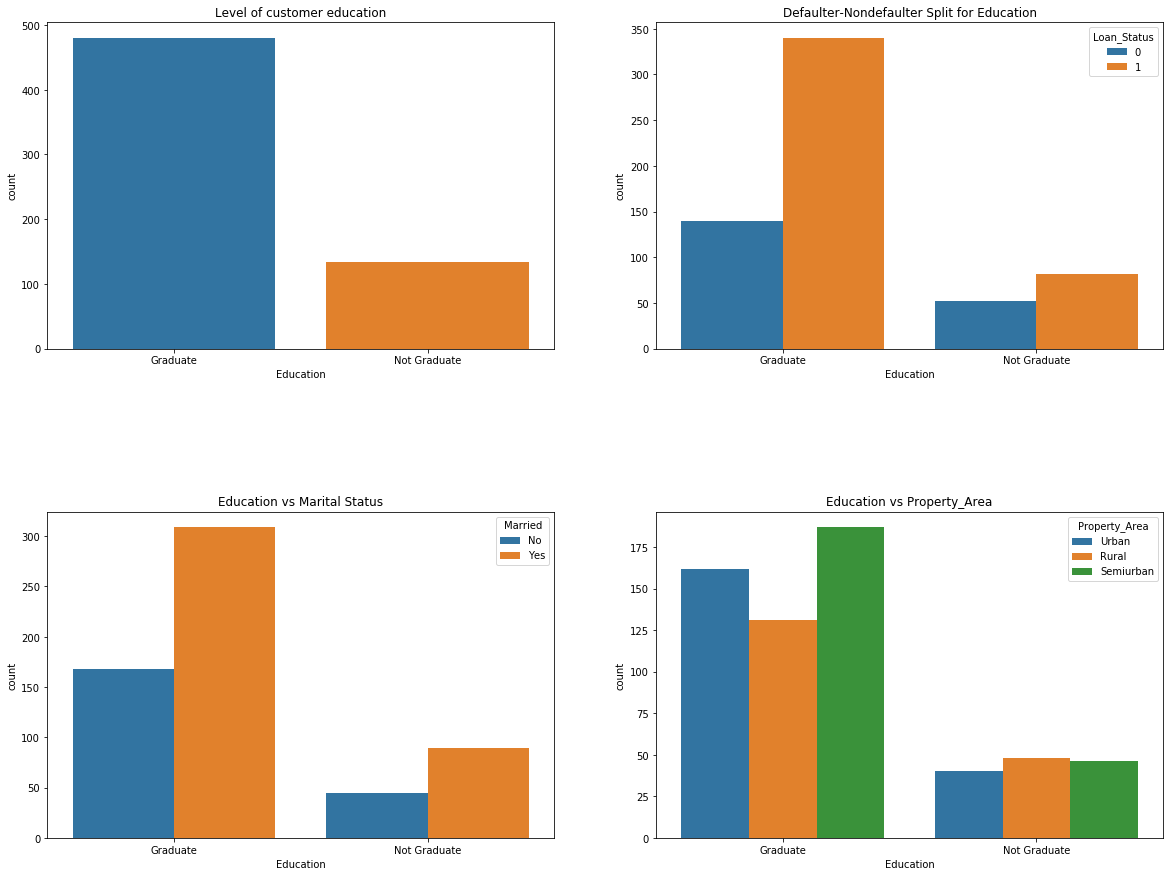

In [41]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Education',data=loan,ax=ax[0,0])
ax[0,0].set_title('Level of customer education')
sns.countplot('Education',hue='Loan_Status',data=loan,ax=ax[0,1])
ax[0,1].set_title('Defaulter-Nondefaulter Split for Education')
sns.countplot('Education',hue='Married',data=loan,ax=ax[1,0])
ax[1,0].set_title('Education vs Marital Status')
sns.countplot('Education',hue='Property_Area',data=loan,ax=ax[1,1])
ax[1,1].set_title('Education vs Property_Area')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

---


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use `ascending=False` to sort in descending order):

In [43]:
loan.sort_values(by='ApplicantIncome', ascending=False).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
409  LP002317   Male     Yes         3+  Graduate            No   
333  LP002101   Male     Yes          0  Graduate           NaN   
171  LP001585    NaN     Yes         3+  Graduate            No   
155  LP001536   Male     Yes         3+  Graduate            No   
185  LP001640   Male     Yes          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409            81000               0.00      360.00            360.00   
333            63337               0.00      490.00            180.00   
171            51763               0.00      700.00            300.00   
155            39999               0.00      600.00            180.00   
185            39147           4,750.00      120.00            360.00   

     Credit_History Property_Area  Loan_Status  
409            0.00         Rural            0  
333            1.00         Urban            1  
171            1.00         Urban            1  
155            0.00     Semiurban            1  
185            1.00     Semiurban            1

Alternatively, we can also sort by multiple columns:

In [44]:
loan.sort_values(by=['Loan_Status', 'ApplicantIncome'],ascending=[True, False]).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
409  LP002317   Male     Yes         3+  Graduate            No   
183  LP001637   Male     Yes          1  Graduate            No   
284  LP001922   Male     Yes          0  Graduate            No   
308  LP001996   Male      No          0  Graduate            No   
369  LP002191   Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409            81000               0.00      360.00            360.00   
183            33846               0.00      260.00            360.00   
284            20667               0.00         nan            360.00   
308            20233               0.00      480.00            360.00   
369            19730           5,266.00      570.00            360.00   

     Credit_History Property_Area  Loan_Status  
409            0.00         Rural            0  
183            1.00     Semiurban            0  
284            1.00         Rural            0  
308            1.00         Rural            0  
369            1.00         Rural            0

---


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**

In [45]:
loan_num = loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
loan_num

ApplicantIncome  CoapplicantIncome  LoanAmount
0               5849               0.00         nan
1               4583           1,508.00      128.00
2               3000               0.00       66.00
3               2583           2,358.00      120.00
4               6000               0.00      141.00
..               ...                ...         ...
609             2900               0.00       71.00
610             4106               0.00       40.00
611             8072             240.00      253.00
612             7583               0.00      187.00
613             4583               0.00      133.00

[614 rows x 3 columns]

In [46]:
loan_num.apply(np.max) #only for numerical values

ApplicantIncome     81,000.00
CoapplicantIncome   41,667.00
LoanAmount             700.00
dtype: float64

The `apply` method can also be used to apply a function to each line. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all education starting with G, we can do it like this:

In [47]:
loan[loan['Education'].apply(lambda education: education[0] == 'G')].head()

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   
4  LP001008   Male      No          0  Graduate            No   
5  LP001011   Male     Yes          2  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         nan            360.00   
1             4583           1,508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
4             6000               0.00      141.00            360.00   
5             5417           4,196.00      267.00            360.00   

   Credit_History Property_Area  Loan_Status  
0            1.00         Urban            1  
1            1.00         Rural            0  
2            1.00         Urban            1  
4            1.00         Urban            1  
5            1.00         Urban            1

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [48]:
#create a copy
loan_new = loan

In [49]:
d = {'N' : 'Defaulter', 'Y' : 'Repayer'}
loan_new['Loan_Status'] = loan_new['Loan_Status'].map(d)
loan_new.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         nan            360.00   
1             4583           1,508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583           2,358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban         NaN  
1            1.00         Rural         NaN  
2            1.00         Urban         NaN  
3            1.00         Urban         NaN  
4            1.00         Urban         NaN

The same thing can be done with the `replace` method:

In [50]:
loan_new = loan_new.replace({'Loan_Status': d})
loan.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         nan            360.00   
1             4583           1,508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583           2,358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban         NaN  
1            1.00         Rural         NaN  
2            1.00         Urban         NaN  
3            1.00         Urban         NaN  
4            1.00         Urban         NaN

---